## ERA5 El Niño

This example demonstrates how to:
- Retrieve some interesting data from the Copernicus Climate Data Store (CDS) using `earthkit-data`
- Create three subplots comparing different time steps and add a shared legend

#### Retrieving the data

In this example we will visualise how sea surface temperature was affected by the El Niño event of 1997.

In [1]:
import earthkit

In [2]:
YEARS = {
    1993: "Normal conditions",
    1997: "El Niño",
    1998: "La Niña",
}

In [3]:
data = earthkit.data.from_source(
    "cds", "reanalysis-era5-single-levels-monthly-means",
    {
        "product_type": "monthly_averaged_reanalysis",
        "variable": "sea_surface_temperature",
        "year": list(YEARS),
        "month": "12",
        "time": "00:00",
        "area": [20, 100, -20, -60],
        "grid": [0.25, 0.25],
    },
)

In [4]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sst,surface,0,19931201,0,0,an,0,regular_ll
1,ecmf,sst,surface,0,19971201,0,0,an,0,regular_ll
2,ecmf,sst,surface,0,19981201,0,0,an,0,regular_ll


#### Plotting the data

In [5]:
style = earthkit.maps.styles.Contour(
    colors="Spectral_r",
    levels=range(15, 33),
    units="celsius",
)

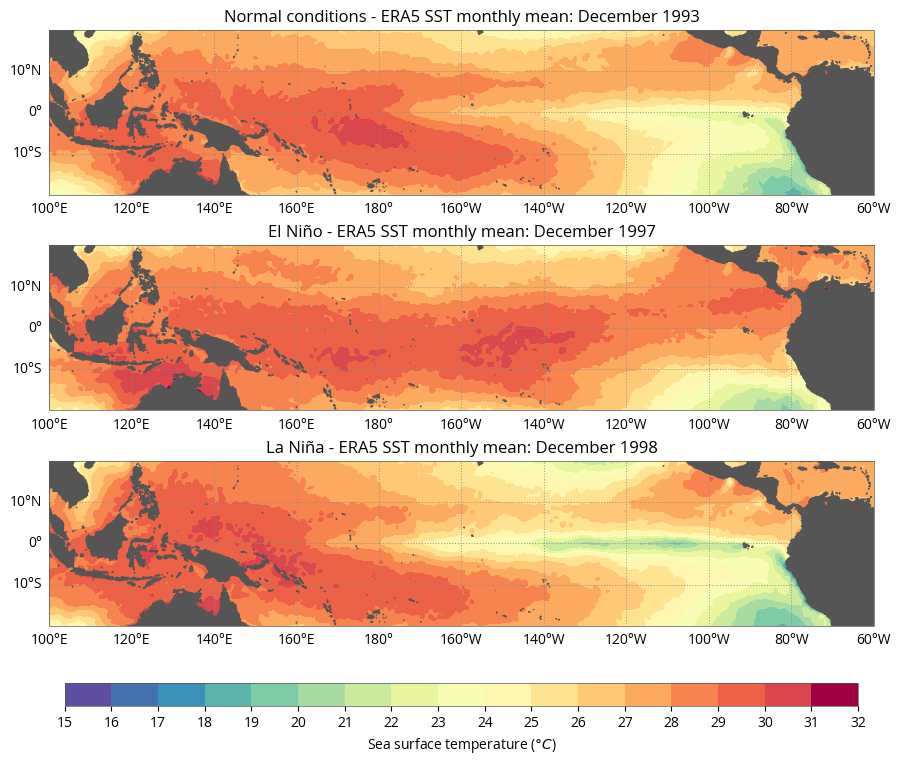

In [6]:
chart = earthkit.maps.Superplot(
    domain=[100, 300, -20, 20],
    rows=3,
)

chart.plot(data, style=style)

chart.land(color="#555", zorder=10)
chart.gridlines(xlocs=range(-180, 180, 20), ylocs=range(-20, 20, 10))

for subplot, conditions in zip(chart, YEARS.values()):
    subplot.title(f"{conditions} - ERA5 SST monthly mean: {{time:%B %Y}}")
    
chart.legend(location="bottom", ticks=range(15, 33))
    
chart.show()